In [3]:
library(ggplot2)
library(dplyr)
library(stringr)
library(tidyverse)
library(RColorBrewer)
library(ggpubr)

Warning message:
“package ‘dplyr’ was built under R version 4.3.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘stringr’ was built under R version 4.3.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.3.3”
Warning message:
“package ‘tibble’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.3”
Warning message:
“package ‘readr’ was built under R version 4.3.3”
Warning message:
“package ‘purrr’ was built under R version 4.3.3”
Warning message:
“package ‘forcats’ was built under R version 4.3.3”
Warning message:
“package ‘lubridate’ was built under R version 4.3.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     

# 24hrs

In [4]:
df<-read.csv('MSD - Sheet1.csv')


In [5]:
colnames(df)[8:17]<-c( "IFNy","IL10","IL12p70","IL13","IL1","IL2","IL4","IL6" ,"IL8","TNFa")


In [6]:
df$donor<-str_extract(df$well, "BR\\d{4}")
df$cohort<-substr(df$donor,1,3)
df$timepoint <- as.numeric(str_extract(df$well, "(?<=\\s)\\d+"))
df[8:17]<-as.data.frame(lapply(df[8:17],as.character))


In [7]:
df_wide<-df%>%
  pivot_longer(cols = colnames(df)[8:17], 
               names_to = "Cytokine", 
               values_to = "Value")


In [8]:
df_wide <- df_wide %>%
  mutate(Value = case_when(
    grepl(">", Value) ~ NA_real_,     # if '>' replace with NA
    grepl("<", Value) ~ 0,            # if '<' replace with 0
    TRUE ~ as.numeric(Value)          # otherwise convert to numeric
  ))
tail(df_wide)

experiment,well,X,dilution,replicate,sample_type,X.1,donor,cohort,timepoint,Cytokine,Value
<chr>,<chr>,<lgl>,<int>,<int>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
EXP-01523_W4,EXP-01503_w3-Samples-BR1008-A2 24.fcs,NA,1,1,Sample,NA,BR1008,BR1,24,IL1,31.52840
EXP-01523_W4,EXP-01503_w3-Samples-BR1008-A2 24.fcs,NA,1,1,Sample,NA,BR1008,BR1,24,IL2,2233.38003
EXP-01523_W4,EXP-01503_w3-Samples-BR1008-A2 24.fcs,NA,1,1,Sample,NA,BR1008,BR1,24,IL4,148.78496
EXP-01523_W4,EXP-01503_w3-Samples-BR1008-A2 24.fcs,NA,1,1,Sample,NA,BR1008,BR1,24,IL6,22.74331
EXP-01523_W4,EXP-01503_w3-Samples-BR1008-A2 24.fcs,NA,1,1,Sample,NA,BR1008,BR1,24,IL8,453.79639
EXP-01523_W4,EXP-01503_w3-Samples-BR1008-A2 24.fcs,NA,1,1,Sample,NA,BR1008,BR1,24,TNFa,914.05214


In [9]:
df_24hr<-df_wide %>% filter(timepoint==24)

# 4hr

In [10]:
df<-read.csv('MSD-IL13_UNSTIM.csv',skip=1)


In [11]:
colnames(df)[3:12]<-c( "IFNy","IL10","IL12p70","IL13","IL1","IL2","IL4","IL6" ,"IL8","TNFa")


In [12]:
df$donor<-str_extract(df$Sample, "BR\\d{4}")
df$cohort<-substr(df$donor,1,3)
df$timepoint<-substring(df$Sample,8)



In [13]:
df[3:12]<-as.data.frame(lapply(df[3:12],as.character))

In [14]:
# convert wide format to long format for plotting
df_wide<-df%>%
  pivot_longer(cols = colnames(df)[3:12], 
               names_to = "Cytokine", 
               values_to = "Value")
head(df_wide)

X,Sample,donor,cohort,timepoint,Cytokine,Value
<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,BR1008 4,BR1008,BR1,4,IFNy,4093.619612
NA,BR1008 4,BR1008,BR1,4,IL10,13.02643802
NA,BR1008 4,BR1008,BR1,4,IL12p70,0.078038816
NA,BR1008 4,BR1008,BR1,4,IL13,7.415123597
NA,BR1008 4,BR1008,BR1,4,IL1,2.242143473
NA,BR1008 4,BR1008,BR1,4,IL2,2290.419082


In [15]:
df_wide <- df_wide %>%
  mutate(Value = case_when(
    grepl("DIV", Value) ~ NA_real_,     # if '>' replace with NA
    TRUE ~ as.numeric(Value)          # otherwise convert to numeric
  ))
head(df_wide)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Value = case_when(grepl("DIV", Value) ~ NA_real_, TRUE ~
  as.numeric(Value))`.
Caused by warning:
! NAs introduced by coercion”


X,Sample,donor,cohort,timepoint,Cytokine,Value
<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
NA,BR1008 4,BR1008,BR1,4,IFNy,4.093620e+03
NA,BR1008 4,BR1008,BR1,4,IL10,1.302644e+01
NA,BR1008 4,BR1008,BR1,4,IL12p70,7.803882e-02
NA,BR1008 4,BR1008,BR1,4,IL13,7.415124e+00
NA,BR1008 4,BR1008,BR1,4,IL1,2.242143e+00
NA,BR1008 4,BR1008,BR1,4,IL2,2.290419e+03


In [16]:
df_4hr<-df_wide %>% filter(timepoint==4)

# Combine

In [17]:
df_4hr<-df_4hr %>% select(donor,cohort,timepoint,Cytokine,Value)
df_24hr<-df_24hr %>% select(donor,cohort,timepoint,Cytokine,Value)

In [18]:
df_combined<-rbind(df_4hr,df_24hr)

In [19]:
df_combined<-df_combined %>% mutate(Age_Group=case_when(cohort=="BR1"~"Young", TRUE ~"Older"))
df_combined$Age_Group<-factor(df_combined$Age_Group,levels=c("Young","Older"))

In [20]:
df_combined<-df_combined %>% mutate(timepoint = case_when(timepoint ==4~"4 hrs", TRUE ~"24 hrs"))

In [21]:
df_combined$timepoint<-factor(df_combined$timepoint,levels=c("4 hrs","24 hrs"))

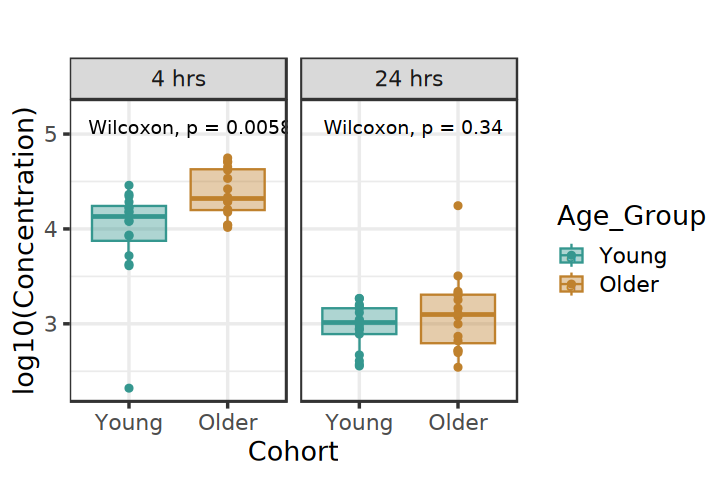

In [22]:
options(repr.plot.width =6, repr.plot.height = 4)

ggplot(data = df_combined %>% filter(Cytokine=="IFNy"), 
       aes(x = Age_Group, y = log10(Value), color = Age_Group)) +
  geom_point() +
  geom_boxplot(aes(fill = Age_Group), alpha = 0.4, outlier.shape = NA,
               position = position_dodge(width = 0.75)) +

labs(title = "", x = "Cohort", y = "log10(Concentration)") +
  stat_compare_means(label.y=5) +
  scale_fill_manual(values = c("Older" = "#bf812d", "Young" = "#35978f")) +
  scale_color_manual(values = c("Older" = "#bf812d", "Young" = "#35978f")) +
  scale_y_continuous(limits = c(NA, max(log10(df_combined$Value[df_combined$Cytokine=="IFNy"])) * 1.1))+
theme_bw(base_size=16)+facet_wrap(~timepoint)

In [23]:
write.csv(df_combined,"Cytokine_Profile.csv")